# PROJECT_01 

                                               **__AUTHOR : ENGR-AREEJ__**
                                         **__DATASET : LOAN APPROVAL PREDICTION__**
                                                **__DATE : 26/07/2024__**

## Project Overview: 
## Loan Approval Prediction
### Objective:

The aim of this project is to gain practical experience in managing and analyzing messy datasets. The project involves cleaning data, performing Exploratory Data Analysis (EDA), identifying and removing outliers, manually splitting the data, training a K-Nearest Neighbors (KNN) model, and evaluating the model using both manual splitting and cross-validation. A summary of the project, including results and screenshots, will be documented in a Word file.

## Dataset:

__Name: Loan-Approval-Prediction-Dataset__

__Source: Kaggle__

## Data Cleaning:

* Loading Data:
Load the dataset into a Pandas DataFrame for initial inspection and manipulation.

## Handling Missing Values:
Identify missing values and apply suitable imputation strategies such as:
* Mean/median imputation
* Forward/backward fill
* Document the chosen strategies and reasons for their selection.
* Correcting Data Types and Standardizing Formats:
* Ensure that data types are appropriate for each column and standardize formats for consistency.

## Exploratory Data Analysis (EDA):

* Perform a thorough analysis of the dataset to understand its structure and uncover patterns.
* Visualize data distributions and relationships between variables.
* Summarize key findings from the EDA.

## Outlier Detection and Removal:

* Identify outliers that may skew the analysis.
* Use statistical methods or visualization techniques to detect outliers.
* Remove or adjust outliers as necessary.

## Data Splitting:

## Manual Splitting:

* Split the dataset into training and testing sets manually to ensure balanced representation.

## Cross-Validation:

* Implement cross-validation to evaluate the model's performance more robustly.

## Model Training:

* Train a K-Nearest Neighbors (KNN) model using the cleaned and prepared data.
* Fine-tune model parameters to optimize performance.

## Model Evaluation:

* Evaluate the KNN model using both manual splitting and cross-validation techniques.
* Compare the results from different evaluation methods to assess model reliability and generalizability.

## Documentation:

* Compile a detailed summary of the project in a Word file.
* Include key results, visualizations, and screenshots of important steps and findings.
* Provide a comprehensive overview of the entire process, from data cleaning to model evaluation.

## Expected Deliverables:

* Cleaned and processed dataset.
* EDA findings and visualizations.
* Documentation of missing value handling and outlier removal strategies.
* Trained KNN model.
* Evaluation results from manual splitting and cross-validation.
* A Word document summarizing the project, complete with screenshots and detailed explanations.

# IMPORT LIBRARIES

In [138]:
# Importing all libraries to be used
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

# DATA LOADING

In [139]:
# Load the Dataset
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

In [140]:
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EXPLORE THE DATASET

In [141]:
df.shape

(4269, 13)

In [142]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [143]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # For simplicity, we'll drop rows with missing values

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [144]:
# Check data types
print(df.dtypes)

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [145]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


<Axes: >

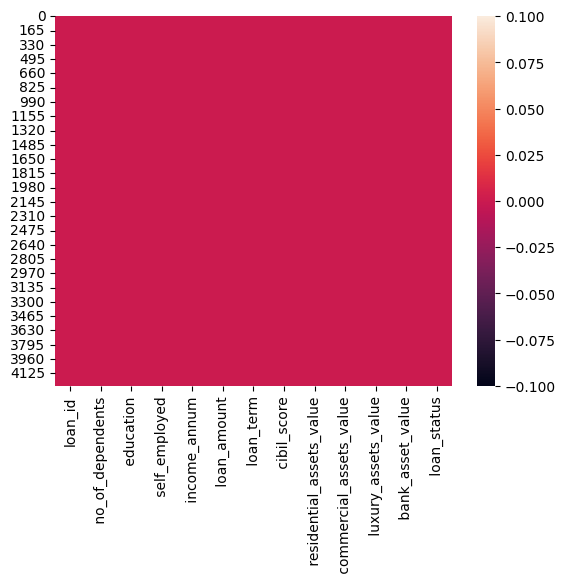

In [147]:
# heatmap for missing value
sns.heatmap(df.isnull())

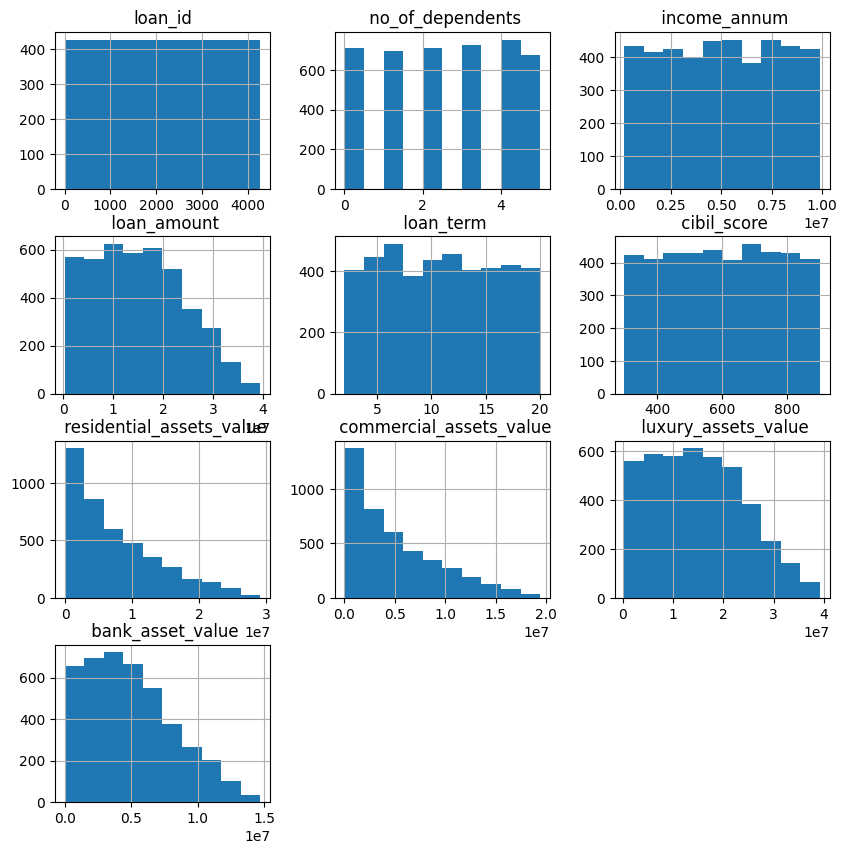

In [148]:
# Histogram
df.hist(figsize=(10, 10))
plt.show()

# ADD OTHER COLUMNS

In [149]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [150]:
a=[' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status']

In [151]:
b=['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [152]:
dic = dict(zip(a,b))
dic

{' no_of_dependents': 'no_of_dependents',
 ' education': 'education',
 ' self_employed': 'self_employed',
 ' income_annum': 'income_annum',
 ' loan_amount': 'loan_amount',
 ' loan_term': 'loan_term',
 ' cibil_score': 'cibil_score',
 ' residential_assets_value': 'residential_assets_value',
 ' commercial_assets_value': 'commercial_assets_value',
 ' luxury_assets_value': 'luxury_assets_value',
 ' bank_asset_value': 'bank_asset_value',
 ' loan_status': 'loan_status'}

In [153]:
df=df.rename(columns=dic)
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [154]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# DATA CLEANING

In [155]:
df.duplicated().sum()

0

In [156]:
# Check the null values
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [157]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [158]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [159]:
df['education'] = df['education'].str.strip()
df['self_employed'] =df['self_employed'].str.strip()
df['loan_status'] =df['loan_status'].str.strip()

In [160]:
print(df.isnull().sum())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


#  OUTLIER DETECTION

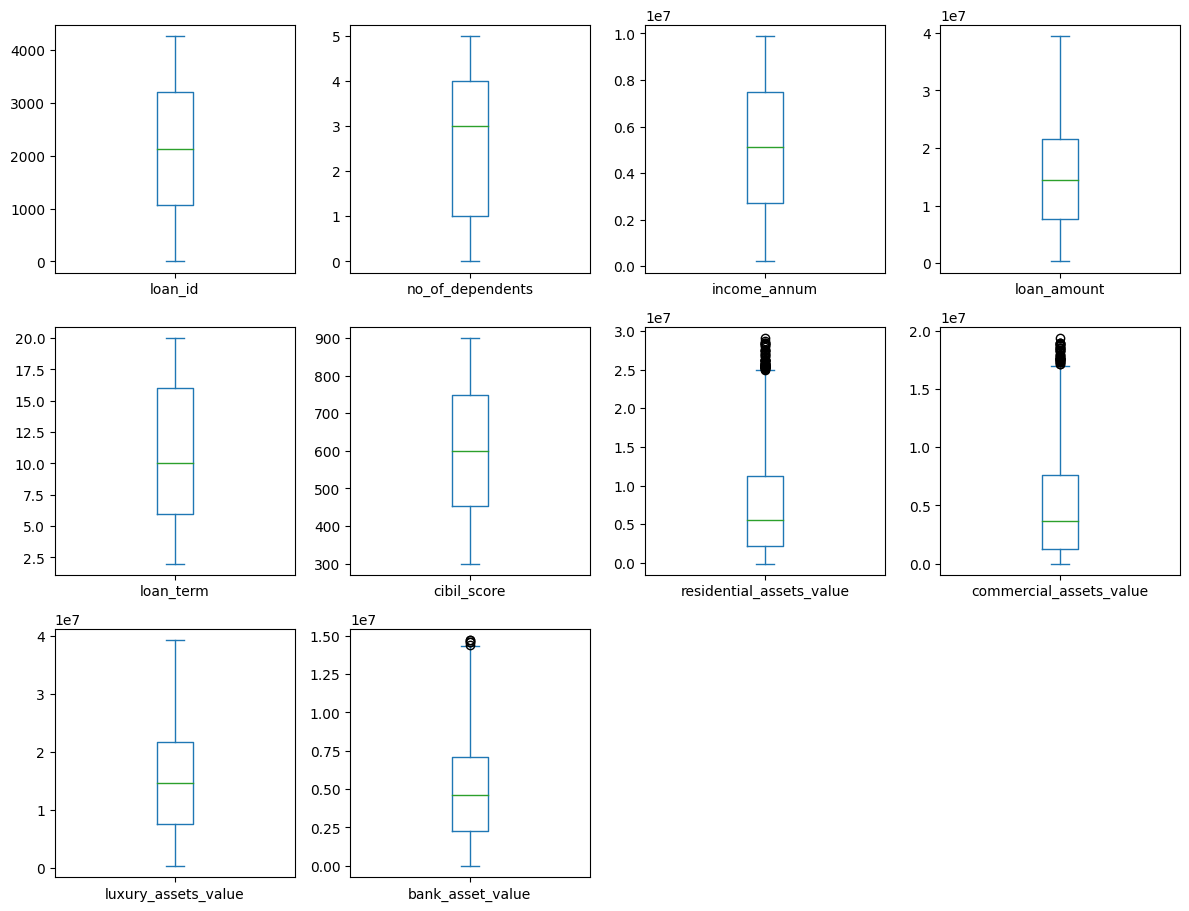

In [161]:
df.plot(kind='box', figsize= (12,12), layout=(4,4), sharex= False, subplots= True) ;plt.tight_layout()

### Detecting Outliers using IQR

In [162]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [163]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

In [164]:
# Detect outliers using both methods
for column in df.select_dtypes(include=[np.number]).columns:
    iqr_outliers = detect_outliers_iqr(df, column)
    zscore_outliers = detect_outliers_zscore(df, column)
    
    print(f"\nColumn: {column}")
    print(f"IQR method outliers: {len(iqr_outliers)}")
    print(f"Z-score method outliers: {len(zscore_outliers)}")


Column: loan_id
IQR method outliers: 0
Z-score method outliers: 0

Column: no_of_dependents
IQR method outliers: 0
Z-score method outliers: 0

Column: income_annum
IQR method outliers: 0
Z-score method outliers: 0

Column: loan_amount
IQR method outliers: 0
Z-score method outliers: 0

Column: loan_term
IQR method outliers: 0
Z-score method outliers: 0

Column: cibil_score
IQR method outliers: 0
Z-score method outliers: 0

Column: residential_assets_value
IQR method outliers: 52
Z-score method outliers: 16

Column: commercial_assets_value
IQR method outliers: 37
Z-score method outliers: 17

Column: luxury_assets_value
IQR method outliers: 0
Z-score method outliers: 0

Column: bank_asset_value
IQR method outliers: 5
Z-score method outliers: 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


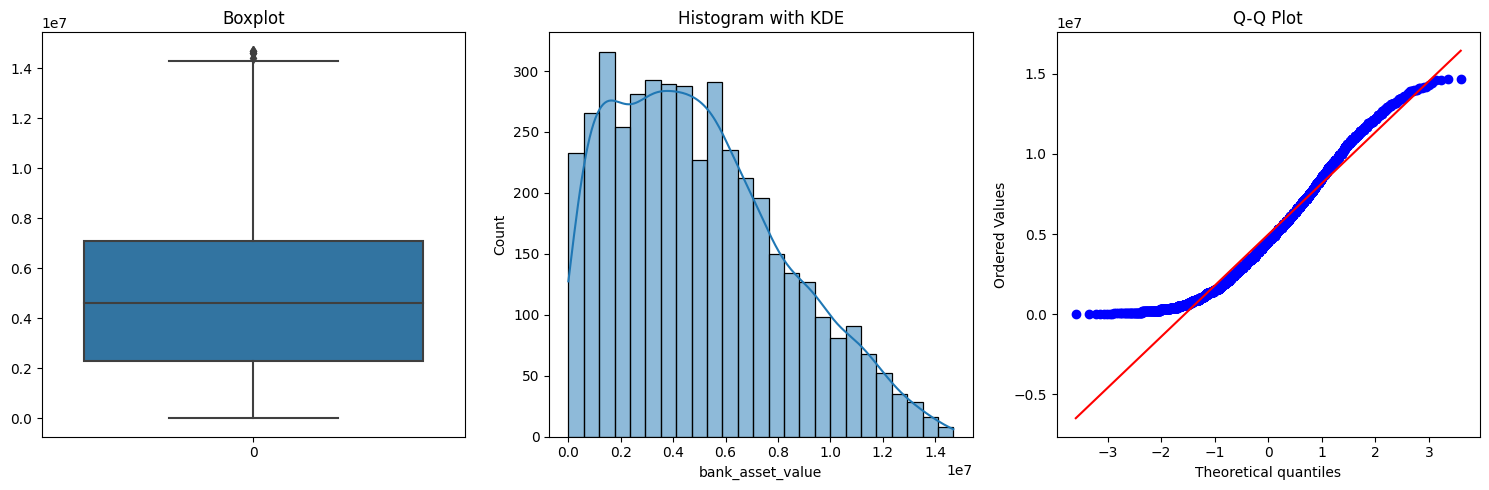

In [165]:
# Visualization fot bank_asset_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['bank_asset_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['bank_asset_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['bank_asset_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


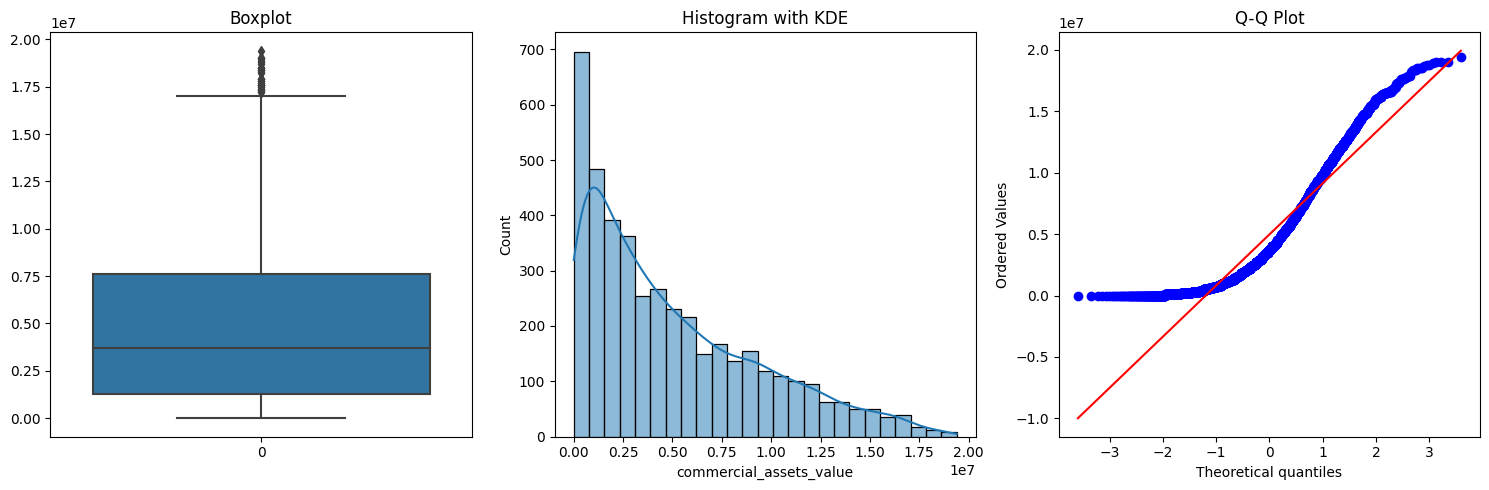

In [166]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['commercial_assets_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['commercial_assets_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['commercial_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


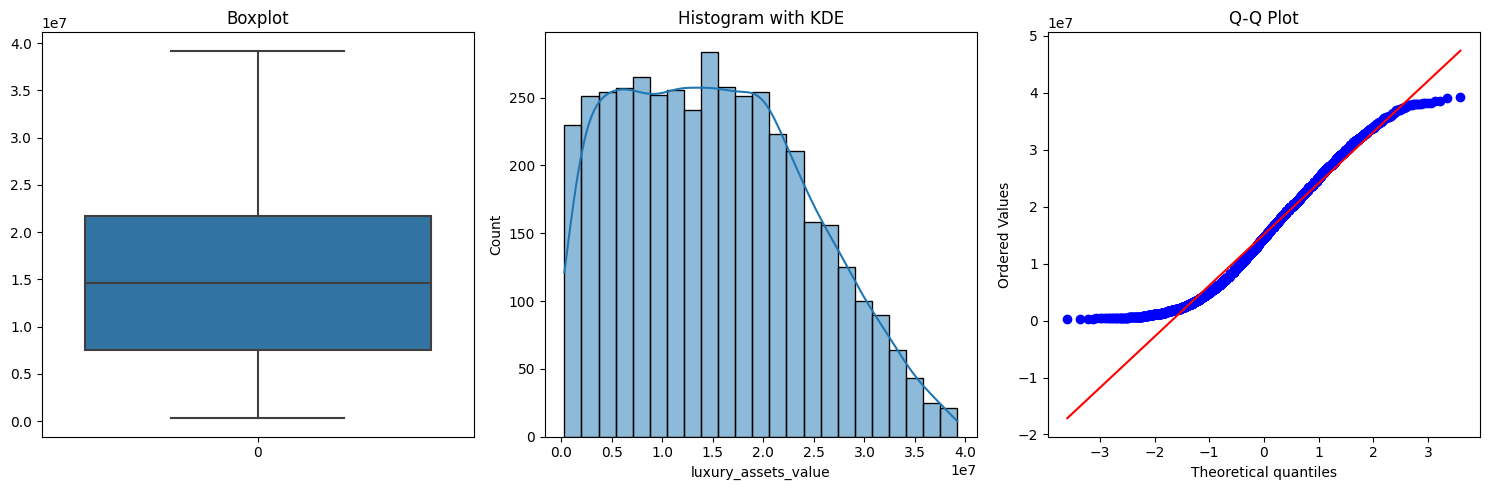

In [167]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['luxury_assets_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['luxury_assets_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['luxury_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

### Treating Outliers

Caping with Outliers , In the dataset loan Approval , extreme values in commercial , luxury and bank asset values are possible since there can be people having lots of money in Bank and having more worth properties , as it can be crucial values for our analysis and modelling we will cape with it

In [168]:
def cap_outliers(df, column, method='IQR'):
    if method == 'IQR':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'zscore':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
    
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply to all numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df = cap_outliers(df, column, method='IQR')  # or 'zscore'

In [169]:
df.shape

(4269, 13)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


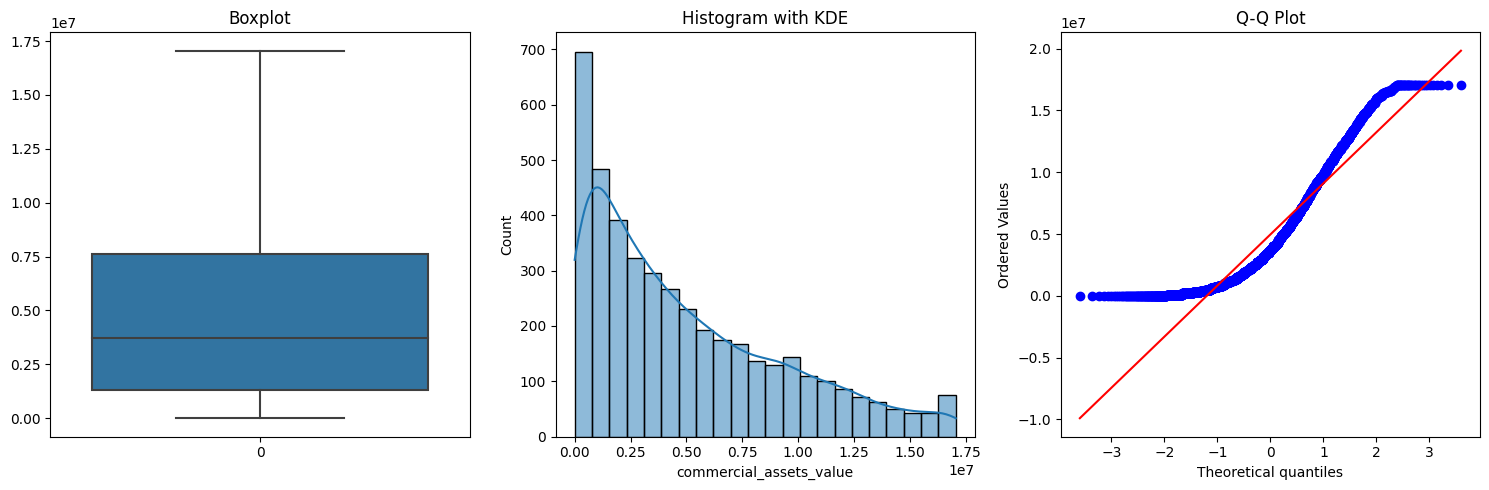

In [170]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['commercial_assets_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['commercial_assets_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['commercial_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

### Correlation Between Features 

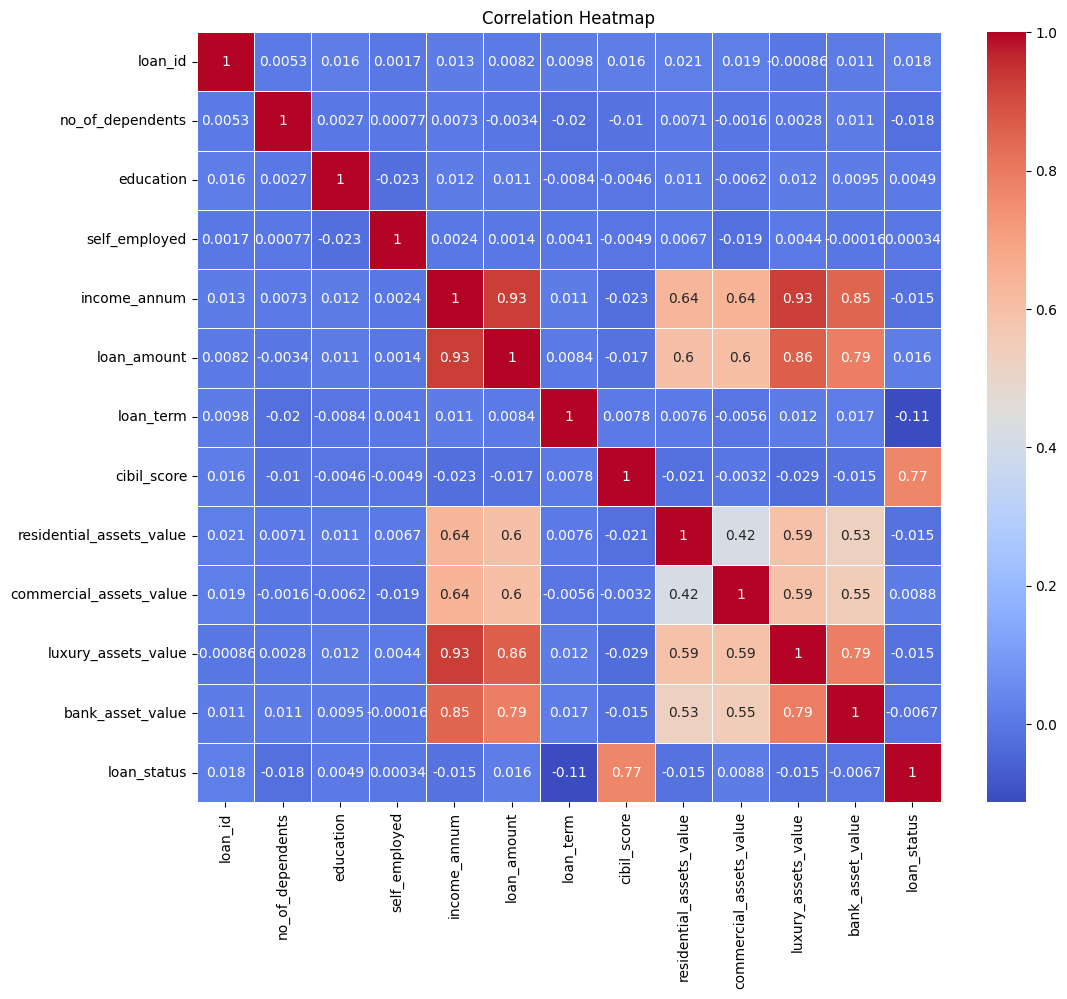

In [171]:
# Making a copy of the dataframe to avoid modifying the original
df_corr = df.copy()

# Encoding binary categorical variables 
binary_cats = ['education', 'self_employed', 'loan_status']
for col in binary_cats:
    df_corr[col] = df_corr[col].map({'No': 0, 'Yes': 1, 'Not Graduate': 0, 'Graduate': 1, 'Rejected': 0, 'Approved': 1})

plt.figure(figsize=(12, 10))
# Create a correlation matrix using the numeric columns
correlation_matrix = df_corr.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# DISTRIBUTION OF THE DATASET EACH FEATURE

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

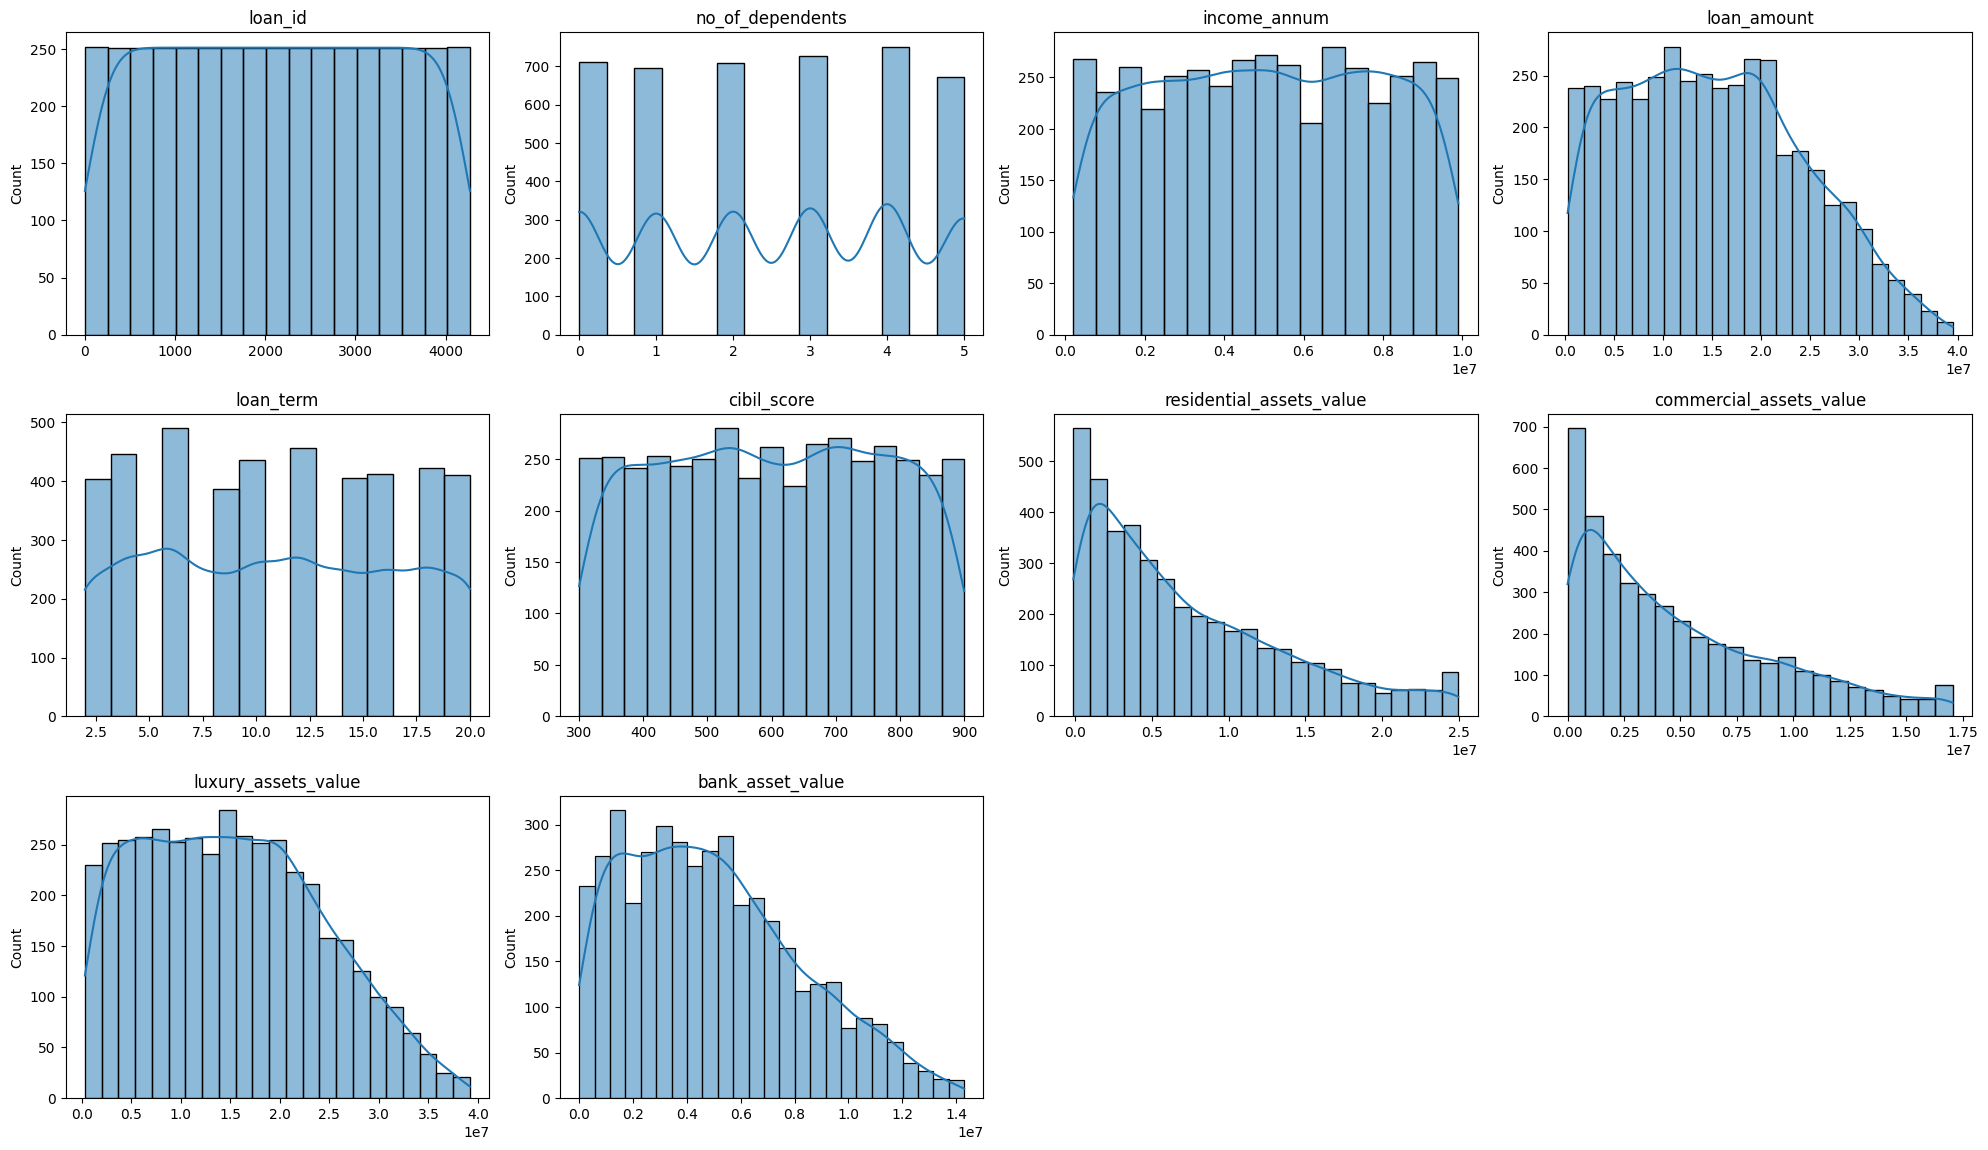

In [172]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel('')  

plt.tight_layout()
plt.show()

# VISUALIZATION NUMERIC FEATURES RELATIONSHIP(CORRELATION)

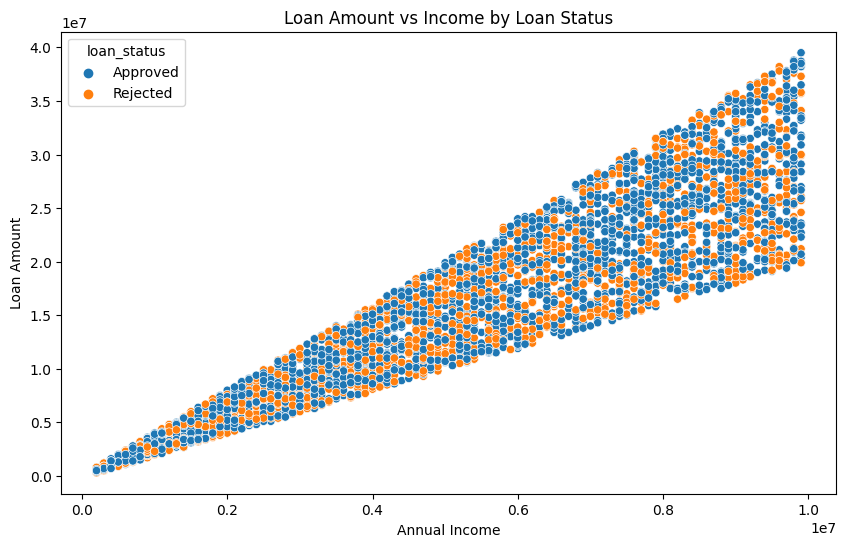

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Loan Status')
plt.show()

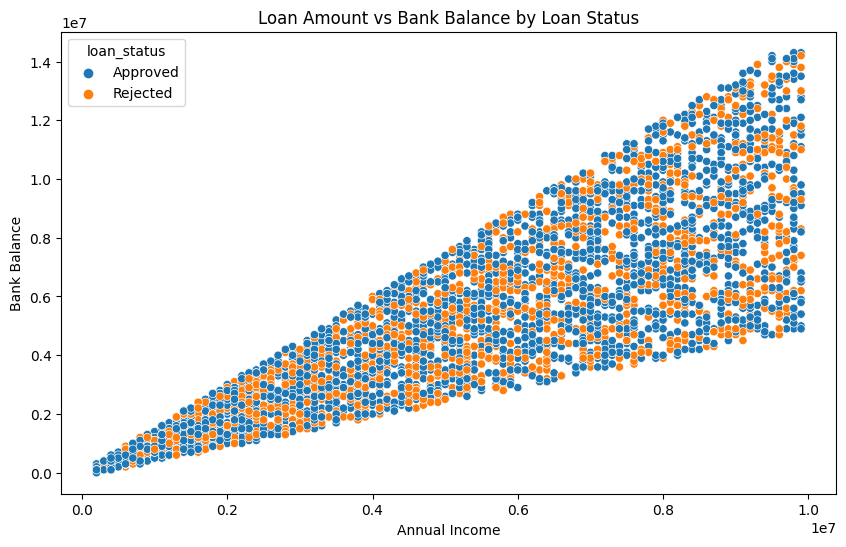

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='bank_asset_value', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Bank Balance')
plt.title('Loan Amount vs Bank Balance by Loan Status')
plt.show()

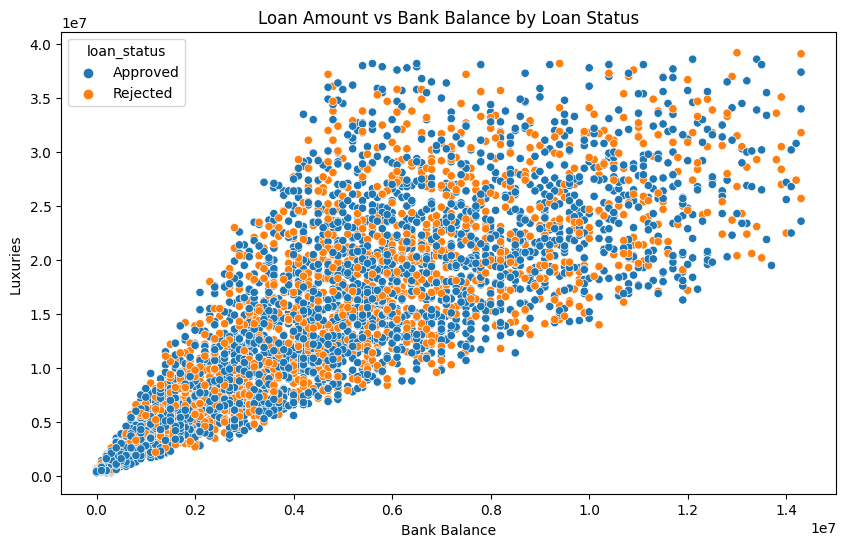

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bank_asset_value', y='luxury_assets_value' , hue='loan_status')
plt.xlabel('Bank Balance')
plt.ylabel('Luxuries ')
plt.title('Loan Amount vs Bank Balance by Loan Status')
plt.show()

### Applicants with more balance in their accounts tend to buy high value luxury items

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

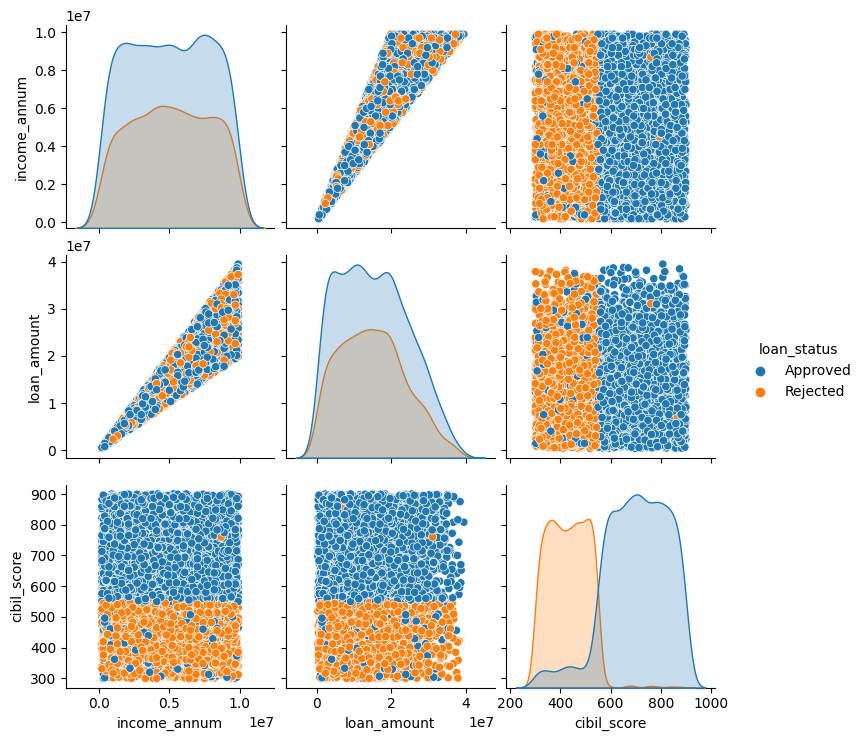

In [176]:
#Pair plot for key numeric variables:
sns.pairplot(df[['income_annum', 'loan_amount', 'cibil_score', 'loan_status']], hue='loan_status')
plt.show()

### No relation between cibil score and income anum and loan amount

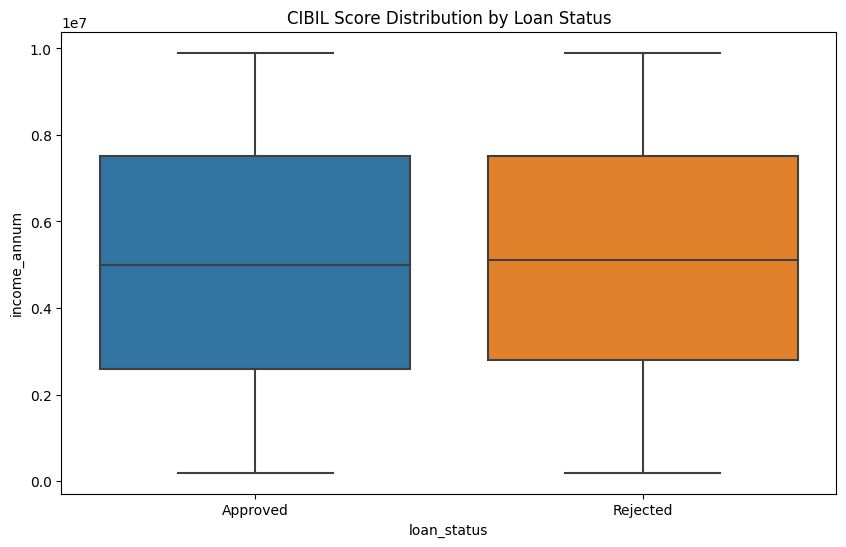

In [177]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

## ANALYZING THE FEATURE HAVING THE HIGH CHANCE OF LOAN APPROVAL

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

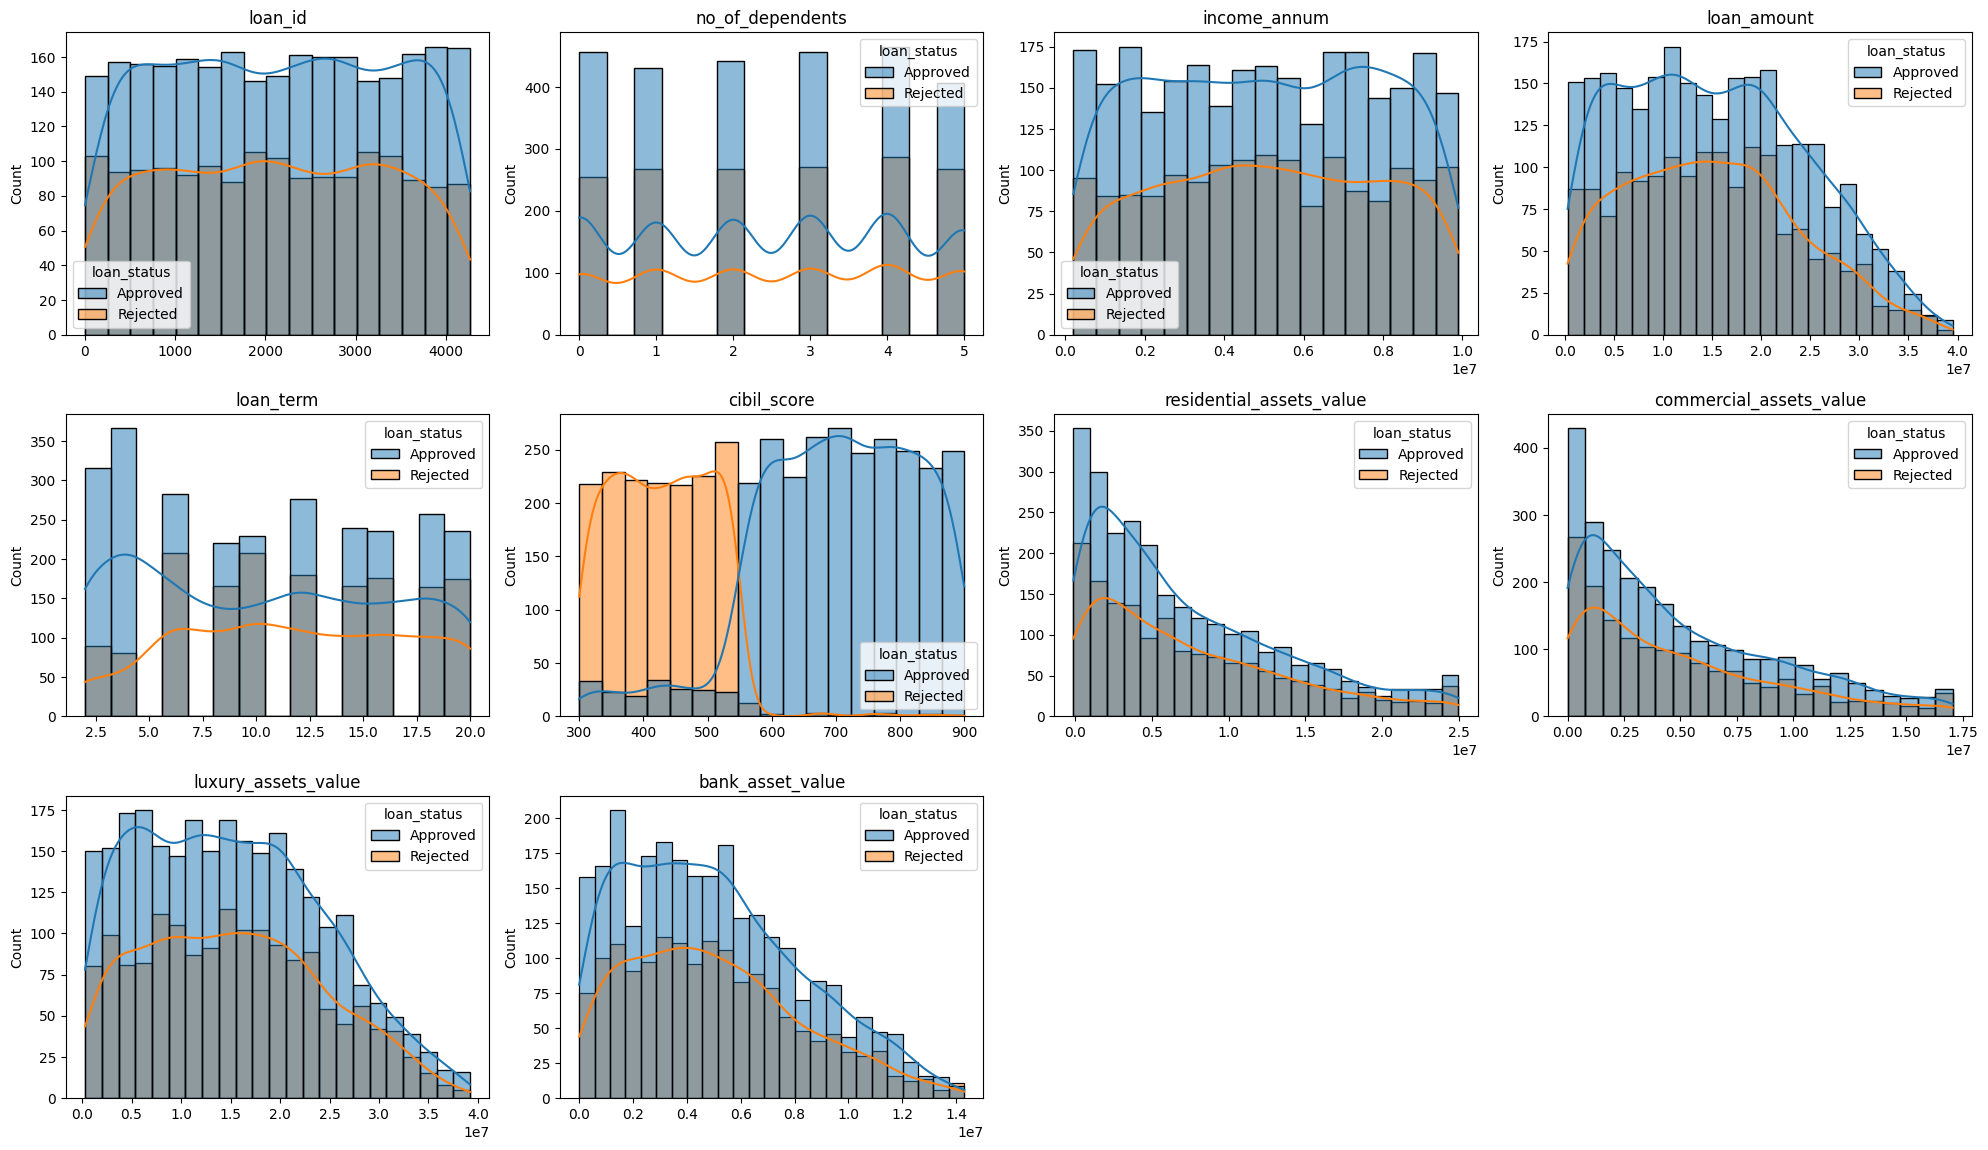

In [178]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True, hue='loan_status')
    plt.title(column)
    plt.xlabel('')  

plt.tight_layout()
plt.show()

### As the cibil_score increases the Approval of loan status has been seen
INDICATING applicants having a good credit history and loan replayment tends to have higher chances of loan approval

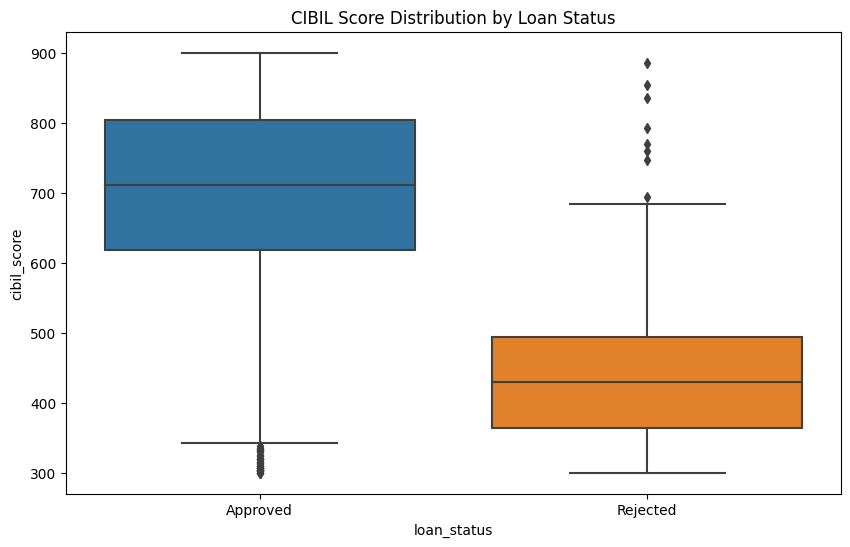

In [179]:
# CIBIL score distribution by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

### INDICATING applicants having a good credit history and loan replayment tends to have higher chances of loan approval, highest loan rejection is in region below 500 cibil score , where as above 600 cibil_score Applicants tends to get approved except for few people

### Analyzing Cause of the Outlier

CIBIL Score range:
count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

Number of high CIBIL score (>700) rejections: 7


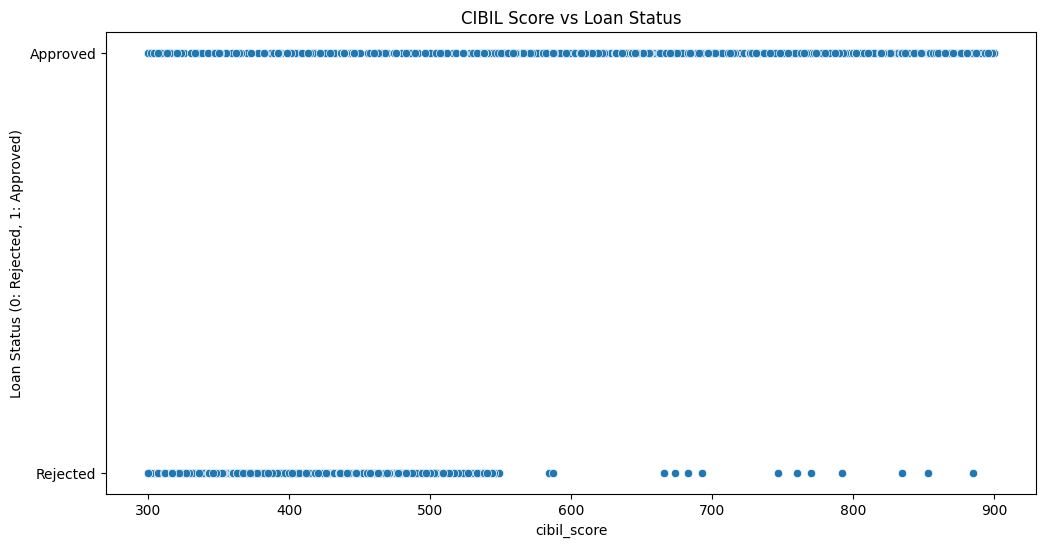

In [180]:
print("CIBIL Score range:")
print(df['cibil_score'].describe());

high_cibil_threshold = 700  # Adjust this value based on the CIBIL score range in your dataset
high_cibil_rejected = df[(df['cibil_score'] > high_cibil_threshold) & (df['loan_status'] == 'Rejected')]
print(f"\nNumber of high CIBIL score (>{high_cibil_threshold}) rejections: {len(high_cibil_rejected)}");

plt.figure(figsize=(12, 6))
sns.scatterplot(x='cibil_score', y='loan_status', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.ylabel('Loan Status (0: Rejected, 1: Approved)')
plt.show();

# MODELLING

## FEATURE SELECTION

In [181]:
# Drop unnecessary columns
columns_to_drop = ['loan_id']
df = df.drop(columns=columns_to_drop)

# Select features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Rejected': 0, 'Approved': 1})

### Manual Data Splitting:

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling:

In [183]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training (KNN):

In [184]:
knn = KNeighborsClassifier(n_neighbors=16)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=16)

### Model Evaluation:

Accuracy: 0.9016
Precision: 0.9330
Recall: 0.9086
F1-score: 0.9206
ROC-AUC: 0.8993


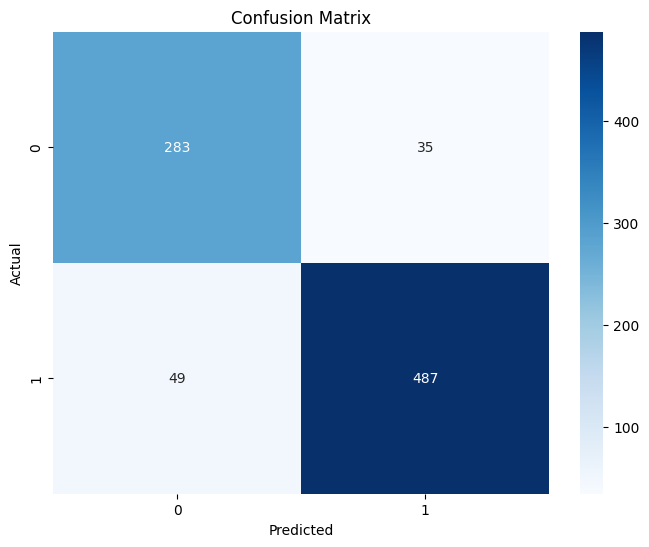

In [185]:
# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Cross-validation:|

In [186]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.88726208 0.89751098 0.91508053 0.91800878 0.92093704]
Mean CV score: 0.9078


### ROC Curve:

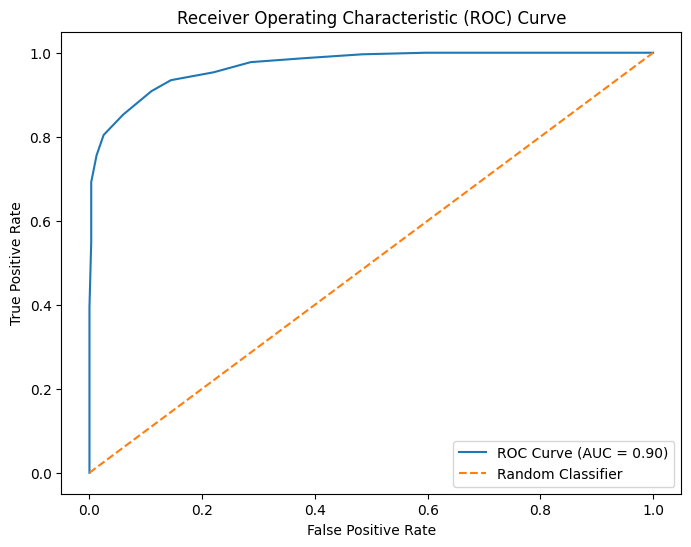

In [187]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [188]:
df['loan_status'] = df['loan_status'].replace({' Approved':'Approved',' Rejected':'Rejected'})

In [189]:
import scipy.stats as stats

In [190]:
pvalue=[]
for i in df.drop('loan_status',axis=1).columns:
    if df[i].dtype=='object':
        stat,pval,_,_ = stats.chi2_contingency(pd.crosstab(df[i],df['loan_status']))
        pvalue.append(pval)
    else:
        a=df[df['loan_status']=='Approved'][i]
        b=df[df['loan_status']=='Rejected'][i]
        stat,pval = stats.ttest_ind(a,b)
        pvalue.append(pval)

In [191]:
pvalue

[0.23668903607722613,
 0.7720042291016309,
 1.0,
 0.321105124071832,
 0.29145225045092293,
 1.2911854638274257e-13,
 0.0,
 0.32764510326873786,
 0.5654817842360422,
 0.31240360685550905,
 0.6594761809451466]

In [192]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [193]:
col = ['education', 'self_employed','no_of_dependents','income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [194]:
sig = pd.DataFrame({'Features':col,'p-value':pvalue})
sig

,Features,p-value
0,education,2.366890e-01
1,self_employed,7.720042e-01
2,no_of_dependents,1.000000e+00
3,income_annum,3.211051e-01
4,loan_amount,2.914523e-01
5,loan_term,1.291185e-13
6,cibil_score,0.000000e+00
7,residential_assets_value,3.276451e-01
8,commercial_assets_value,5.654818e-01
9,luxury_assets_value,3.124036e-01


In [195]:
sig[sig['p-value']>0.05]['Features'].values

array(['education', 'self_employed', 'no_of_dependents', 'income_annum',
       'loan_amount', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value',
       'bank_asset_value'], dtype=object)

In [196]:
df = df[['education', 'self_employed', 'no_of_dependents', 'income_annum',
       'loan_amount', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value',
       'bank_asset_value','loan_status']]
df.head()

,education,self_employed,no_of_dependents,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,Graduate,No,2,9600000,29900000,2400000,17050000,22700000,8000000,Approved
1,Not Graduate,Yes,0,4100000,12200000,2700000,2200000,8800000,3300000,Rejected
2,Graduate,No,3,9100000,29700000,7100000,4500000,33300000,12800000,Rejected
3,Graduate,No,3,8200000,30700000,18200000,3300000,23300000,7900000,Rejected
4,Not Graduate,Yes,5,9800000,24200000,12400000,8200000,29400000,5000000,Rejected


In [197]:
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [198]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [199]:
df.columns

Index(['education', 'self_employed', 'no_of_dependents', 'income_annum',
       'loan_amount', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [200]:
df['education'] = df['education'].replace({' Graduate':1,' Not Graduate':0})
df['self_employed'] = df['self_employed'].replace({' No':0,' Yes':1})

In [201]:
df.head()

,education,self_employed,no_of_dependents,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,Graduate,No,2,9600000,29900000,2400000,17050000,22700000,8000000,Approved
1,Not Graduate,Yes,0,4100000,12200000,2700000,2200000,8800000,3300000,Rejected
2,Graduate,No,3,9100000,29700000,7100000,4500000,33300000,12800000,Rejected
3,Graduate,No,3,8200000,30700000,18200000,3300000,23300000,7900000,Rejected
4,Not Graduate,Yes,5,9800000,24200000,12400000,8200000,29400000,5000000,Rejected


In [202]:
df['no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1])

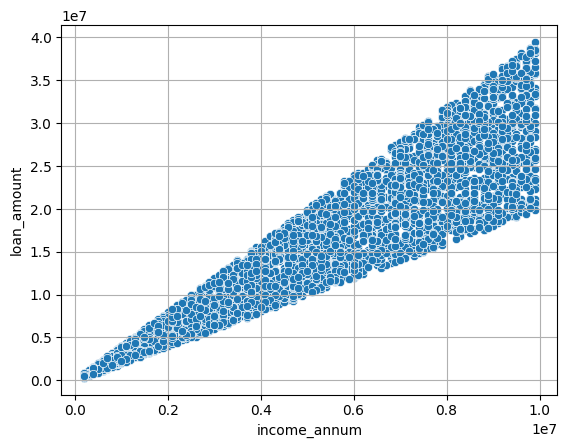

In [203]:
sns.scatterplot(x='income_annum',y='loan_amount',data=df)
plt.grid()
plt.show()

In [204]:
depend = ['income_annum','residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
depend

['income_annum',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

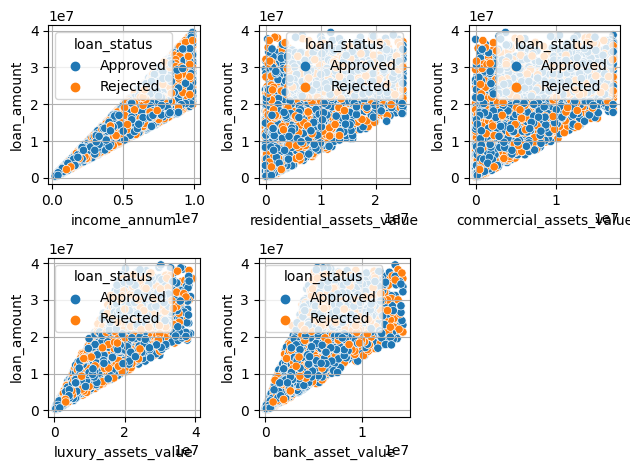

In [205]:
r=2
c=3
it=1
for i in depend:
    plt.subplot(r,c,it)
    sns.scatterplot(x=i,y='loan_amount',data=df,hue='loan_status')
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

# Project 01 Conclusion

Successfully provided comprehensive hands-on experience in managing and analyzing messy datasets. The project encompassed various critical stages, including data cleaning, exploratory data analysis (EDA), outlier detection and removal, manual data splitting, and model training. Utilizing a K-Nearest Neighbors (KNN) model, we evaluated its performance through both manual data splitting and cross-validation. The comparison of these evaluation methods demonstrated the model's robustness and reliability. This project significantly enhanced our understanding and skills in data preprocessing, EDA, and machine learning model evaluation, showcasing the importance of thorough data preparation and analysis in achieving accurate predictive modeling results. Detailed results and visualizations are included in the attached Word file for further reference.